In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [5]:
he_init = tf.contrib.layers.variance_scaling_initializer()

def dnn(inputs, n_hidden_layers=5, n_neurons=100, name=None,
        activation=tf.nn.elu, initializer=he_init):
    with tf.variable_scope(name, "dnn"):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs, n_neurons, activation=activation,
                                     kernel_initializer=initializer,
                                     name="hidden%d" % (layer + 1))
        return inputs

In [6]:
from tensorflow import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(array([ 5444.,  6179.,  5470.,  5638.,  5307.,  4987.,  5417.,  5715.,
         5389.,  5454.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

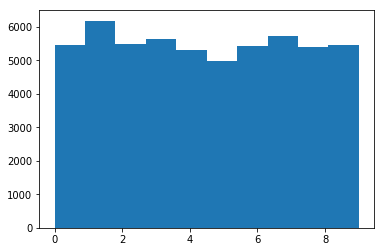

In [8]:
x_train1 = mnist.train.images[mnist.train.labels < 5]
x_train = mnist.train.images
y_train = mnist.train.labels
x_valid = mnist.validation.images
y_valid = mnist.validation.labels
x_test = mnist.test.images
y_test = mnist.test.labels


plt.hist(y_train, bins = 10)

In [9]:
# keep in mind that we will be peeling off the 5 digits
# Let's define a helper function that to help us separate out only the digits we want from the mixed entire dataset.
def getDigitsFromDataset(digits, x , y):
    
    mask = np.zeros_like(y,dtype = bool)
    
    for digit in digits:
        
        mask += (y == digit)
        
    x = x[mask]
    y = y[mask]
    
    return x,y

    

In [10]:
# Let's adopt a naming system that will help us keep what we're trying to do straight:# 
# base will refer to the dataset containing the digits 0 through 4.
# transfer will refer to the dataset containing the digits 5 and 9.

x_train_base, y_train_base = getDigitsFromDataset(range(5), x_train, y_train)

x_train_base == x_train1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [11]:

def plot_grid(x, grid_size = 6):
    
    plt.figure(figsize = (18,9))
    
    for i in range(1,2* grid_size**2 +1,1):
        
        plt.subplot(grid_size, 2*grid_size, i)
        plt.imshow(x[i], cmap = plt.get_cmap('gray'))
        plt.axis('off')
        
    plt.show()

In [12]:
#plot_grid(x_train_base)

In [13]:
x_test_base, y_test_base = getDigitsFromDataset(range(5), x_test, y_test)
x_train_transfer, y_train_transfer = getDigitsFromDataset([5,6,7,8, 9], x_train, y_train)


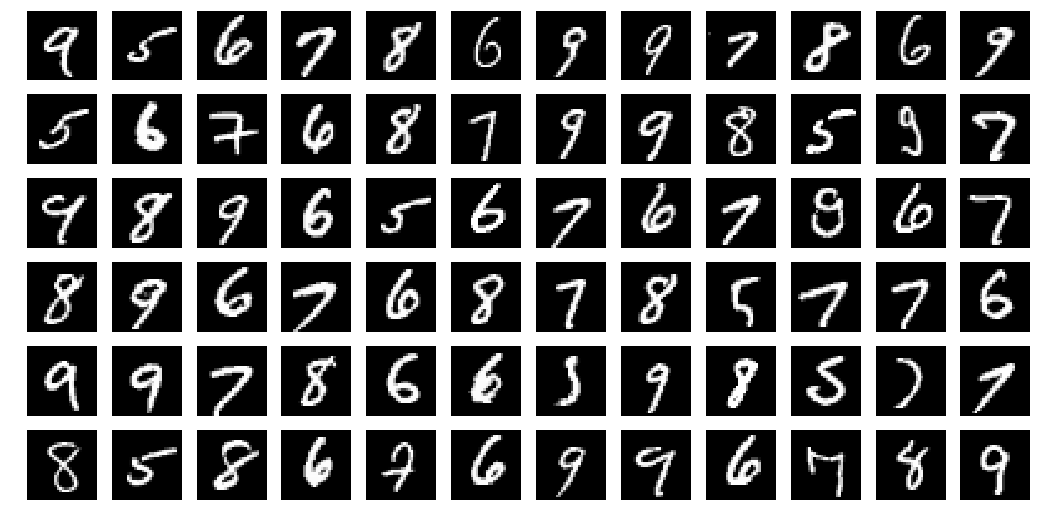

In [24]:
#plot_grid(x_train_transfer)

In [14]:
x_test_transfer, y_test_transfer = getDigitsFromDataset([5,6,7,8,9], x_test, y_test)

In [15]:
def dnn(inputs, n_hidden_layers=5, n_neurons=100, name=None,
        activation=tf.nn.elu, initializer=he_init):
    with tf.variable_scope(name, "dnn"):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs, n_neurons, activation=activation,
                                     kernel_initializer=initializer,
                                     name="hidden%d" % (layer + 1))
        return inputs

In [61]:
n_inputs = 28 * 28 # MNIST
n_outputs = 5
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="inputs")
### Base Model
with tf.variable_scope('base'):    
    y_base = tf.placeholder(tf.int64, shape = (None,5), name='labels')
    with tf.variable_scope(None, "dnn"):
        inputs = X        
        inputs_1 = tf.layers.dense(inputs, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 1)
        inputs_2 = tf.layers.dense(inputs_1, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 2)
        inputs_3 = tf.layers.dense(inputs_2, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 3)
        
        inputs_4 = tf.layers.dense(inputs_3, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 4)
        inputs_5 = tf.layers.dense(inputs_4, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,

    with tf.variable_scope("logits"):
        logits = tf.contrib.layers.fully_connected(inputs= inputs_5,
                                      num_outputs=5,
                                      activation_fn=None,
                                      weights_initializer=tf.initializers.truncated_normal(stddev=0.1),
                                      biases_initializer=tf.initializers.constant(0.1))
        Y_proba = tf.nn.softmax(logits, name="Y_proba")
    #### Model Evaluation
    
    with tf.variable_scope("cross_entropy"):
        cross_entropy_base = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_base, logits=logits))
    
    base_vars = [var for var in tf.trainable_variables() if var.name.startswith("base")]
    
    with tf.variable_scope("Adam"):
        train_step_base = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_base, var_list=base_vars)
    
    with tf.variable_scope("correct_prediction"):
        correct_prediction_base = tf.equal(tf.argmax(logits, 1), tf.argmax(y_base, 1))
    
    with tf.variable_scope("accuracy"):
        accuracy_base = tf.reduce_mean(tf.cast(correct_prediction_base, tf.float32))
        accuracy_base_summary = tf.summary.scalar("base_accuracy", accuracy_base)
        

        
### Transfer Fork with frozen five layers
with tf.variable_scope("transfer"):
    y_trans = tf.placeholder(tf.float32, shape=[None, 5], name="labels")
    
    # FC
    with tf.variable_scope("logits"):
        fc2_trans = tf.contrib.layers.fully_connected(inputs=inputs_5,
                                      num_outputs=5,
                                      activation_fn=None,
                                      weights_initializer=tf.initializers.truncated_normal(stddev=0.1),
                                      biases_initializer=tf.initializers.constant(0.1))
    
    #### Model Evaluation
    with tf.variable_scope("cross_entropy"):
        cross_entropy_trans = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_trans, logits=fc2_trans))
    
    trans_vars = [var for var in tf.trainable_variables() if var.name.startswith("transfer")]
    
    with tf.variable_scope("Adam"):
        train_step_trans = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_trans, var_list=trans_vars)
        
    with tf.variable_scope("correct_prediction"):
        correct_prediction_trans = tf.equal(tf.argmax(fc2_trans, 1), tf.argmax(y_trans, 1))
    
    with tf.variable_scope("accuracy"):
        accuracy_trans = tf.reduce_mean(tf.cast(correct_prediction_trans, tf.float32))
        accuracy_trans_summary = tf.summary.scalar("transfer_accuracy", accuracy_trans)
    
        
### Transfer Fork with only frozen four layers
with tf.variable_scope("transfer_4"):
    y_trans_4 = tf.placeholder(tf.float32, shape=[None, 5], name="labels")
    
    # FC
    with tf.variable_scope("logits"):
        fc2_trans_4 = tf.contrib.layers.fully_connected(inputs=inputs_4,
                                      num_outputs=5,
                                      activation_fn=None,
                                      weights_initializer=tf.initializers.truncated_normal(stddev=0.1),
                                      biases_initializer=tf.initializers.constant(0.1))
    
    #### Model Evaluation
    with tf.variable_scope("cross_entropy"):
        cross_entropy_trans_4 = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_trans_4, logits=fc2_trans_4))
        
    trans_vars_4 = [var for var in tf.trainable_variables() if var.name.startswith("transfer_4")]
    
    with tf.variable_scope("Adam"):
        train_step_trans_4 = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_trans_4, var_list=trans_vars_4)
        
    with tf.variable_scope("correct_prediction"):
        correct_prediction_trans_4 = tf.equal(tf.argmax(fc2_trans_4, 1), tf.argmax(y_trans_4, 1))
    
    with tf.variable_scope("accuracy"):
        accuracy_trans_4 = tf.reduce_mean(tf.cast(correct_prediction_trans_4, tf.float32))
        accuracy_trans_summary_4 = tf.summary.scalar("transfer_accuracy", accuracy_trans_4)
        
### Transfer Fork with frozen three layers plus two unfrozen layers
with tf.variable_scope("transfer_3"):
    y_trans_3 = tf.placeholder(tf.float32, shape=[None, 5], name="labels")

    with tf.variable_scope(None, "dnn"):
        ## retrain the top two layers
        
        inputs_6 = tf.layers.dense(inputs_3, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 6)
        inputs_7 = tf.layers.dense(inputs_6, 100, activation= tf.nn.elu,
                                     kernel_initializer= he_init,
                                     name="hidden%d" % 7)

    
    # FC
    with tf.variable_scope("logits"):
        fc2_trans_3 = tf.contrib.layers.fully_connected(inputs=inputs_7,
                                      num_outputs=5,
                                      activation_fn=None,
                                      weights_initializer=tf.initializers.truncated_normal(stddev=0.1),
                                      biases_initializer=tf.initializers.constant(0.1))
    
    #### Model Evaluation
    with tf.variable_scope("cross_entropy"):
        cross_entropy_trans_3 = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=y_trans_3, logits=fc2_trans_3))

    trans_vars_3 = [var for var in tf.trainable_variables() if var.name.startswith("transfer_3")]
    
    with tf.variable_scope("Adam"):
        train_step_trans_3 = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_trans_3, var_list=trans_vars_3)
        
    with tf.variable_scope("correct_prediction"):
        correct_prediction_trans_3 = tf.equal(tf.argmax(fc2_trans_3, 1), tf.argmax(y_trans_3, 1))
    
    with tf.variable_scope("accuracy"):
        accuracy_trans_3 = tf.reduce_mean(tf.cast(correct_prediction_trans_3, tf.float32))
        accuracy_trans_summary_3 = tf.summary.scalar("transfer_accuracy", accuracy_trans_3)

In [55]:
base_vars

[<tf.Variable 'base/dnn/hidden1/kernel:0' shape=(784, 100) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden1/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden2/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden2/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden3/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden3/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden4/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden4/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden5/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'base/dnn/hidden5/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'base/logits/fully_connected/weights:0' shape=(100, 5) dtype=float32_ref>,
 <tf.Variable 'base/logits/fully_connected/biases:0' shape=(5,) dtype=float32_ref>]

In [62]:
 trans_vars_3

[<tf.Variable 'transfer_3/dnn/hidden6/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'transfer_3/dnn/hidden6/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'transfer_3/dnn/hidden7/kernel:0' shape=(100, 100) dtype=float32_ref>,
 <tf.Variable 'transfer_3/dnn/hidden7/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'transfer_3/logits/fully_connected/weights:0' shape=(100, 5) dtype=float32_ref>,
 <tf.Variable 'transfer_3/logits/fully_connected/biases:0' shape=(5,) dtype=float32_ref>]

In [63]:
# Create a variable summary for every trainable variable
# and save these summaries to a list to merge later
variable_summaries_to_merge = []
for v in tf.trainable_variables():
    tmp = tf.summary.histogram(v.name, v)
    variable_summaries_to_merge.append(tmp)

INFO:tensorflow:Summary name base/dnn/hidden1/kernel:0 is illegal; using base/dnn/hidden1/kernel_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden1/bias:0 is illegal; using base/dnn/hidden1/bias_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden2/kernel:0 is illegal; using base/dnn/hidden2/kernel_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden2/bias:0 is illegal; using base/dnn/hidden2/bias_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden3/kernel:0 is illegal; using base/dnn/hidden3/kernel_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden3/bias:0 is illegal; using base/dnn/hidden3/bias_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden4/kernel:0 is illegal; using base/dnn/hidden4/kernel_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden4/bias:0 is illegal; using base/dnn/hidden4/bias_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden5/kernel:0 is illegal; using base/dnn/hidden5/kernel_0 instead.
INFO:tensorflow:Summary name base/dnn/hidden

In [64]:
# n_epochs = 1000
# batch_size = 20

def get_batches(x, y, batch_size=20, num_classes=5):
    '''
    Given a set of features x, and a set of labels y,
    return a generator yields shuffled batch_size tuples of x and y.
    
    Note that this function truncates x and y, if necessary,
    so that it only returns full batches.
    '''
    ## Shuffle x and y on the same index permutation
    permute = np.random.permutation(range(len(x)))
    x = x[permute]
    y = y[permute]
    
    ## Truncate x and y so that no batch is empty
    num_batches = len(x) // batch_size
    x, y = x[:num_batches * batch_size], y[:num_batches * batch_size]
    
    # One-hot encode the labels:
    y = np.eye(num_classes)[y]
    
    for i in range(0, len(x), batch_size):
        yield x[i:i + batch_size], y[i:i + batch_size]

In [65]:
# To keep our summary directories separate
from datetime import datetime

In [67]:
batch_size = 20
epochs = 1

summaries_dir = "./summaries/" + datetime.now().strftime("%Y%m%d%H%M%S")

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    merged_variables = tf.summary.merge(variable_summaries_to_merge)
    base_writer = tf.summary.FileWriter(summaries_dir + '/base', sess.graph)
    
    i = 1
    for e in range(epochs):
        for x_, y_ in get_batches(x_train_base, y_train_base, batch_size):
            if i % 20 == 0:
                train_accuracy, summary, acc_sum = sess.run([accuracy_base, merged_variables, accuracy_base_summary],
                    feed_dict={X: x_,
                               y_base: y_})
                print('step %d, base training accuracy %g' % (i, train_accuracy))
                base_writer.add_summary(summary, i)
                base_writer.add_summary(acc_sum, i)
            
            train_step_base.run(
                feed_dict={X: x_,
                           y_base: y_})
            i += 1

    y_test_base_oh = np.eye(5)[y_test_base]
    print('base test accuracy %g' % accuracy_base.eval(
        feed_dict={
            X: x_test_base,
            y_base: y_test_base_oh}))
    
    saver.save(sess, "checkpoints/base.ckpt")


step 20, base training accuracy 0.6
step 40, base training accuracy 0.95
step 60, base training accuracy 0.65
step 80, base training accuracy 0.95
step 100, base training accuracy 0.9
step 120, base training accuracy 0.95
step 140, base training accuracy 0.85
step 160, base training accuracy 1
step 180, base training accuracy 0.95
step 200, base training accuracy 1
step 220, base training accuracy 1
step 240, base training accuracy 0.95
step 260, base training accuracy 1
step 280, base training accuracy 1
step 300, base training accuracy 1
step 320, base training accuracy 1
step 340, base training accuracy 1
step 360, base training accuracy 0.95
step 380, base training accuracy 0.95
step 400, base training accuracy 1
step 420, base training accuracy 0.9
step 440, base training accuracy 1
step 460, base training accuracy 0.95
step 480, base training accuracy 0.95
step 500, base training accuracy 1
step 520, base training accuracy 0.95
step 540, base training accuracy 0.95
step 560, base

In [68]:
# Sanity check the base mdoel
x_train_transfer.shape

(26962, 784)

In [69]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    y_train_transfer_oh = to_categorical(y_train_transfer-5, 5)
    print('transfer accuracy %g' % accuracy_trans.eval(
        feed_dict={
            X: x_train_transfer,
            y_trans: y_train_transfer_oh}))

INFO:tensorflow:Restoring parameters from checkpoints/base.ckpt
transfer accuracy 0.243713


In [70]:
y_train_transfer.T

array([7, 6, 8, ..., 5, 6, 8], dtype=uint8)

In [71]:
#Well, that's about what we would expect for a totally untrained model.

#Let's see if we can't improve that classification by only training the TensorFlow variables in the transfer scope.
# Only use 100 per digit, in total, 500 data points
def get500Data(digits, x , y):
    
    mask = np.zeros_like(y,dtype = bool)
    
    for digit in digits:
        k = 0
        for i in range(len(y)):
            if y[i] == digit and k<100:
                mask[i] += True
                k += 1
        
    x = x[mask]
    y = y[mask]
    
    return x,y


In [72]:
x_train_transfer_500, y_train_transfer_500 = get500Data([5,6,7,8,9], x_train_transfer , y_train_transfer)
x_test_transfer_50, y_test_transfer_50 = x_test_transfer[:50],y_test_transfer[:50]
x_train_transfer_500.shape
x_test_transfer_50.shape

(50, 784)

In [84]:
## train the last layer of transfer learning
batch_size = 20
epochs = 10

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    i = 1
    trans_writer = tf.summary.FileWriter(summaries_dir + '/transfer', sess.graph)
    
    for e in range(epochs):
        for x_, y_ in get_batches(x_train_transfer_500, y_train_transfer_500 - 5, batch_size, num_classes=5):
            if i % 20 == 0:
                train_accuracy, summary, acc_sum = sess.run([accuracy_trans, merged_variables, accuracy_trans_summary],
                    feed_dict={X: x_,
                               y_trans: y_})
                print('step %d, transfer training accuracy %g' % (i, train_accuracy))
                trans_writer.add_summary(summary, i)
                trans_writer.add_summary(acc_sum, i)
            
            train_step_trans.run(
                feed_dict={X: x_,
                           y_trans: y_})
            i += 1
    y_test_transfer_oh =  to_categorical(y_test_transfer_50 - 5,5)
    print('transfer test accuracy %g' % accuracy_trans.eval(
        feed_dict={
            X: x_test_transfer_50,
            y_trans: y_test_transfer_oh}))
    
    saver.save(sess, "checkpoints/trans_five.ckpt")

INFO:tensorflow:Restoring parameters from checkpoints/trans_five.ckpt
step 20, transfer training accuracy 0.9
step 40, transfer training accuracy 0.9
step 60, transfer training accuracy 0.55
step 80, transfer training accuracy 0.7
step 100, transfer training accuracy 0.7
step 120, transfer training accuracy 0.7
step 140, transfer training accuracy 0.8
step 160, transfer training accuracy 0.65
step 180, transfer training accuracy 0.5
step 200, transfer training accuracy 0.7
step 220, transfer training accuracy 0.8
step 240, transfer training accuracy 1
transfer test accuracy 0.74


In [83]:
x_train_transfer

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [85]:
# But now, let's check to see that the base model still doesn't know what the digits 5 to 9 are:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    y_test_transfer_oh = to_categorical(y_test_transfer - 5,5)
    print('base accuracy on transfer digits %g' % accuracy_base.eval(
        feed_dict={
            X: x_test_transfer,
            y_base: y_test_transfer_oh}))

INFO:tensorflow:Restoring parameters from checkpoints/trans_five.ckpt
base accuracy on transfer digits 0.350957


In [86]:
# Additionally, the base model actually shouldn't have changed at all.

# To confirm this, let's see that the test accuracy on the base digit set is still the same:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    y_test_base_oh = to_categorical(y_test_base,5)
    print('base test accuracy %g' % accuracy_base.eval(
        feed_dict={
            X: x_test_base,
            y_base: y_test_base_oh}))

INFO:tensorflow:Restoring parameters from checkpoints/trans_five.ckpt
base test accuracy 0.976455


In [87]:
# import the inspect_checkpoint library
from tensorflow.python.tools import inspect_checkpoint as chkp

In [99]:
# print all tensors in checkpoint file
# chkp.print_tensors_in_checkpoint_file('./checkpoints/base.ckpt', tensor_name='', all_tensors=True)


In [103]:
# reuse four hidden layers instead of five
## train the last layer of transfer learning
batch_size = 10
epochs = 20

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    i = 1
    trans4_writer = tf.summary.FileWriter(summaries_dir + '/transfer_4', sess.graph)
    
    for e in range(epochs):
        for x_, y_ in get_batches(x_train_transfer_500, y_train_transfer_500 - 5, batch_size, num_classes=5):
            if i % 20 == 0:
                train_accuracy, summary, acc_sum = sess.run([accuracy_trans_4, merged_variables, accuracy_trans_summary_4],
                    feed_dict={X: x_,
                               y_trans_4: y_})
                print('step %d, transfer training accuracy %g' % (i, train_accuracy))
                trans_writer.add_summary(summary, i)
                trans_writer.add_summary(acc_sum, i)
            
            train_step_trans_4.run(
                feed_dict={X: x_,
                           y_trans_4: y_})
            i += 1
    y_test_transfer_oh =  to_categorical(y_test_transfer_50 - 5,5)
    print('transfer test accuracy %g' % accuracy_trans_4.eval(
        feed_dict={
            X: x_test_transfer_50,
            y_trans_4: y_test_transfer_oh}))
    
    saver.save(sess, "checkpoints/trans_four.ckpt")



INFO:tensorflow:Restoring parameters from checkpoints/trans_four.ckpt
step 20, transfer training accuracy 0.9
step 40, transfer training accuracy 0.9
step 60, transfer training accuracy 1
step 80, transfer training accuracy 0.8
step 100, transfer training accuracy 0.8
step 120, transfer training accuracy 1
step 140, transfer training accuracy 0.8
step 160, transfer training accuracy 0.8
step 180, transfer training accuracy 0.7
step 200, transfer training accuracy 0.6
step 220, transfer training accuracy 0.9
step 240, transfer training accuracy 0.9
step 260, transfer training accuracy 1
step 280, transfer training accuracy 0.5
step 300, transfer training accuracy 0.9
step 320, transfer training accuracy 0.8
step 340, transfer training accuracy 0.9
step 360, transfer training accuracy 0.9
step 380, transfer training accuracy 0.8
step 400, transfer training accuracy 0.9
step 420, transfer training accuracy 0.8
step 440, transfer training accuracy 0.8
step 460, transfer training accuracy 0

In [95]:
## unfreeze top two layers and retrain


In [ ]:

## train the last two layers and the last layer of transfer learning
batch_size = 10
epochs = 20

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    i = 1
    trans3_writer = tf.summary.FileWriter(summaries_dir + '/transfer_3', sess.graph)
    
    for e in range(epochs):
        for x_, y_ in get_batches(x_train_transfer_500, y_train_transfer_500 - 5, batch_size, num_classes=5):
            if i % 20 == 0:
                train_accuracy, summary, acc_sum = sess.run([accuracy_trans_3, merged_variables, accuracy_trans_summary_3],
                    feed_dict={X: x_,
                               y_trans_3: y_})
                print('step %d, transfer training accuracy %g' % (i, train_accuracy))
                trans_writer.add_summary(summary, i)
                trans_writer.add_summary(acc_sum, i)
            
            train_step_trans_3.run(
                feed_dict={X: x_,
                           y_trans_3: y_})
            i += 1
    y_test_transfer_oh =  to_categorical(y_test_transfer_50 - 5,5)
    print('transfer test accuracy %g' % accuracy_trans_3.eval(
        feed_dict={
            X: x_test_transfer_50,
            y_trans_3: y_test_transfer_oh}))
    
    saver.save(sess, "checkpoints/trans_three.ckpt")




